# **Demand Analysis**
This notebook analyzes the demand data across different stores and SKUs.

First guarantee that all the libraries are installed.

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install numpy
# %pip install gurobipy

Then import the libraries we'll use for this analysis.

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
print(os.getcwd())

c:\Users\k_pow\OneDrive\Documents\MIT\MITx SCM\IAP 2025\SCM275x\Assignment Files\DBSCAN


Read data and display first few rows and basic information

In [3]:
# Read the data
# Redefine bases on the path
path = "C:\\Users\\k_pow\\OneDrive\\Documents\\MIT\\MITx SCM\\IAP 2025\\SCM275x\\Assignment Files\\Data\\"
df = pd.read_csv(path + "demand.csv")

# Display first few rows and basic information
print('\First few rows of the dataset: \n')
display(df.head())

print('\Dataset info:')
display(df.info())

\First few rows of the dataset: 



,StoreID,SKU,month,Demand
0,Store-001,SH001,January,51
1,Store-001,SH001,February,58
2,Store-001,SH001,March,55
3,Store-001,SH001,April,45
4,Store-001,SH001,May,39


\Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109080 entries, 0 to 109079
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   StoreID  109080 non-null  object
 1   SKU      109080 non-null  object
 2   month    109080 non-null  object
 3   Demand   109080 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

Basic statistical summary

In [4]:
# Basic statistical summary
print('Statistical summary of Demand:')
display(df['Demand'].describe())

# Count unique values in each column
print('Unique values in each column:')
for col in df.columns:
   print(f"{col}: {df[col].nunique()} unique values")

Statistical summary of Demand:


count    109080.000000
mean         55.691437
std          39.794025
min           0.000000
25%          23.000000
50%          48.000000
75%          82.000000
max         265.000000
Name: Demand, dtype: float64

Unique values in each column:
StoreID: 202 unique values
SKU: 45 unique values
month: 12 unique values
Demand: 252 unique values


Let's inspect the demand distribution

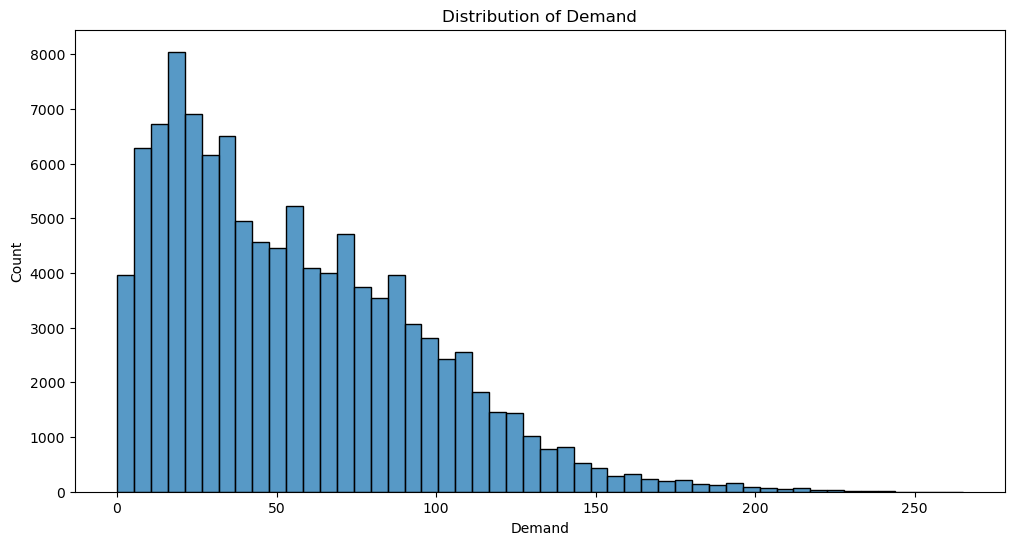

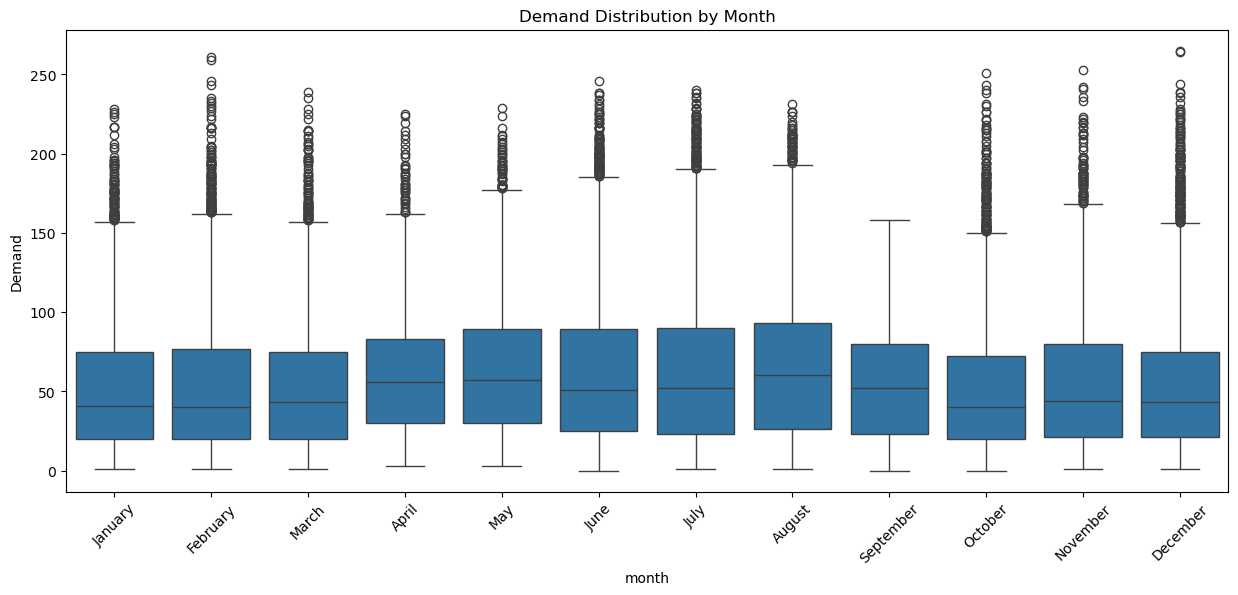

In [5]:
# Plot demand distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Demand', bins=50)
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Count')
plt.show()

# Box plot of demand by month
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='month', y='Demand')
plt.title('Demand Distribution by Month')
plt.xticks(rotation=45)
plt.show()

Let's take a closer look at the seasonal demand

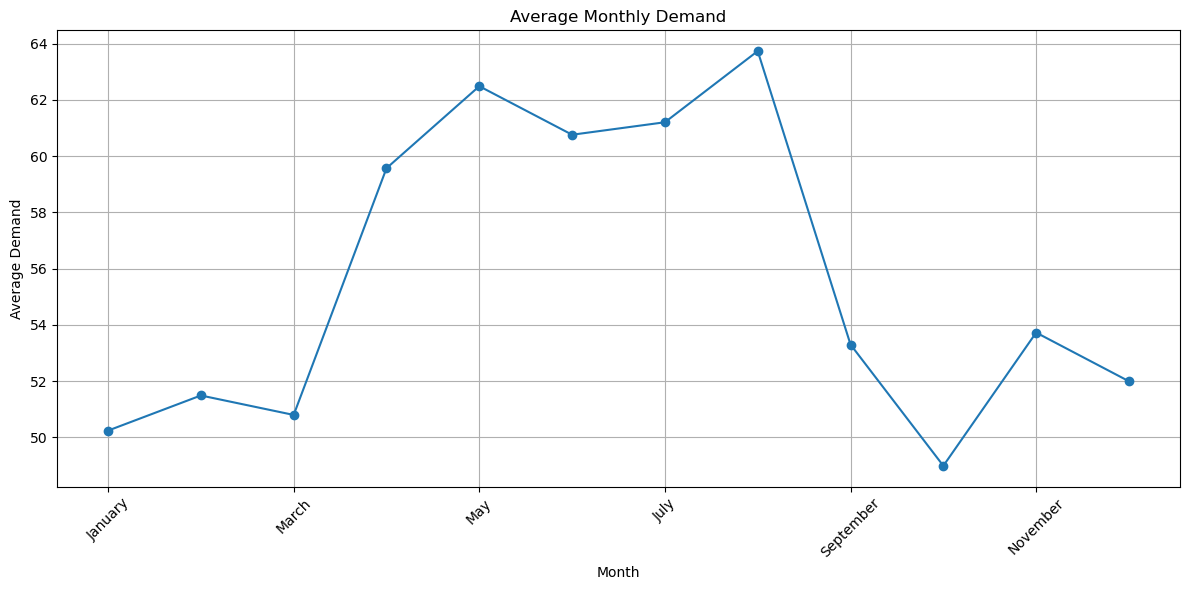

In [6]:

# Calculate average demand by month
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_demand = df.groupby('month')['Demand'].mean().reindex(months_order)

# Create the line plot
plt.figure(figsize=(12, 6))
monthly_demand.plot(kind='line', marker='o')
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ok, demand is higher from April to August. Let's take a look at the demand by store.

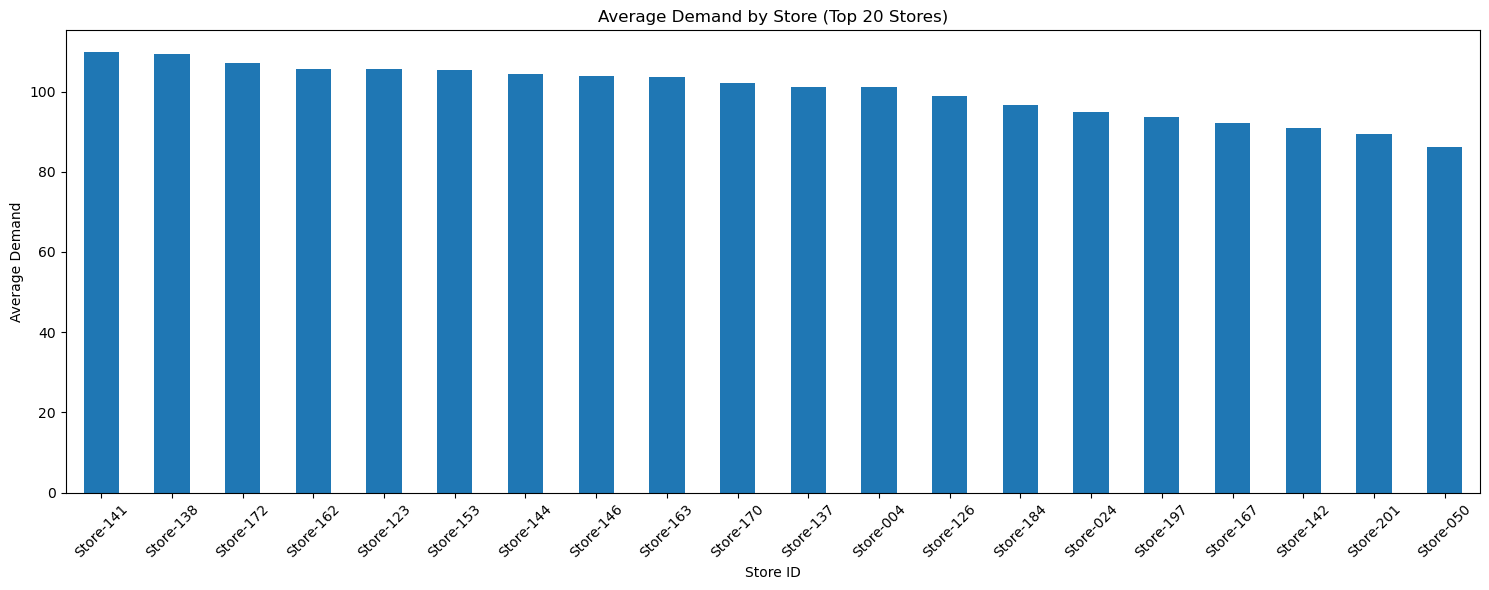


Store Demand Statistics:
count    202.000000
mean      55.691437
std       25.296756
min       10.903704
25%       35.427778
50%       55.504630
75%       73.997685
max      109.792593
Name: Demand, dtype: float64


In [7]:
# Import required libraries if not already imported
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average demand by store
store_demand = df.groupby('StoreID')['Demand'].mean().sort_values(ascending=False)

# Create bar plot for top 20 stores
plt.figure(figsize=(15, 6))
store_demand.head(20).plot(kind='bar')
plt.title('Average Demand by Store (Top 20 Stores)')
plt.xlabel('Store ID')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display summary statistics for stores
print("\nStore Demand Statistics:")
print(store_demand.describe())

# **Demand data + store information & products**

Additional libraries

In [8]:
# Import required libraries
import pandas as pd
import folium
import geopy
# Read the CSV files

demand_df = pd.read_csv(path+'demand.csv')
products_df = pd.read_csv(path+'products.csv')
stores_df = pd.read_csv(path+'stores.csv')

# Merge demand with products using SKU
merged_df = demand_df.merge(products_df, 
                           on='SKU', 
                           how='left')

# Merge result with stores using StoreID
merged_df = merged_df.merge(stores_df, 
                           on='StoreID', 
                           how='left')

# Verify the merge
print("Original demand shape:", demand_df.shape)
print("Final merged shape:", merged_df.shape)

# Check for any missing values after merge
print("\nMissing values after merge:")
print(merged_df.isnull().sum())

# Display first few rows of merged dataset
print("\nFirst few rows of merged dataset:")
print(merged_df.head())

Original demand shape: (109080, 4)
Final merged shape: (109080, 11)

Missing values after merge:
StoreID           0
SKU               0
month             0
Demand            0
Product Name      0
Product Family    0
SKUs/pallet       0
City              0
State             0
Latitude          0
Longitude         0
dtype: int64

First few rows of merged dataset:
     StoreID    SKU     month  Demand  Product Name Product Family  \
0  Store-001  SH001   January      51  Oxfords Shoe          Shoes   
1  Store-001  SH001  February      58  Oxfords Shoe          Shoes   
2  Store-001  SH001     March      55  Oxfords Shoe          Shoes   
3  Store-001  SH001     April      45  Oxfords Shoe          Shoes   
4  Store-001  SH001       May      39  Oxfords Shoe          Shoes   

   SKUs/pallet      City State   Latitude  Longitude  
0           57  New York    NY  40.709853 -73.996295  
1           57  New York    NY  40.709853 -73.996295  
2           57  New York    NY  40.709853 -73.996

Let's now take a look at demand per product family.

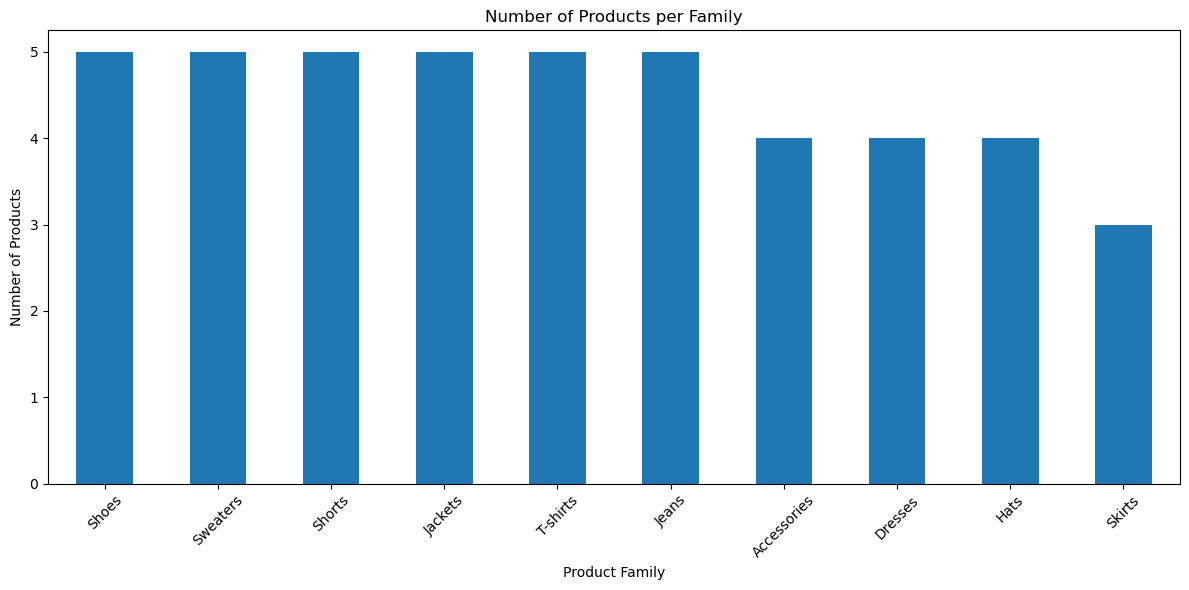


Demand Statistics by Product Family:
                 mean    std  count
Product Family                     
Accessories     57.52  42.08   9696
Dresses         58.40  40.93   9696
Hats            57.24  36.88   9696
Jackets         41.20  41.06  12120
Jeans           63.96  30.73  12120
Shoes           55.56  41.72  12120
Shorts          57.35  43.87  12120
Skirts          66.84  32.10   7272
Sweaters        41.77  43.67  12120
T-shirts        62.75  31.27  12120


In [9]:
plt.figure(figsize=(12, 6))
products_df['Product Family'].value_counts().plot(kind='bar')
plt.title('Number of Products per Family')
plt.xlabel('Product Family')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

family_demand = merged_df.groupby('Product Family')['Demand'].agg(['mean', 'std', 'count']).round(2)
print("\nDemand Statistics by Product Family:")
print(family_demand)

Boxplots of demand per month  by top 5 product families 

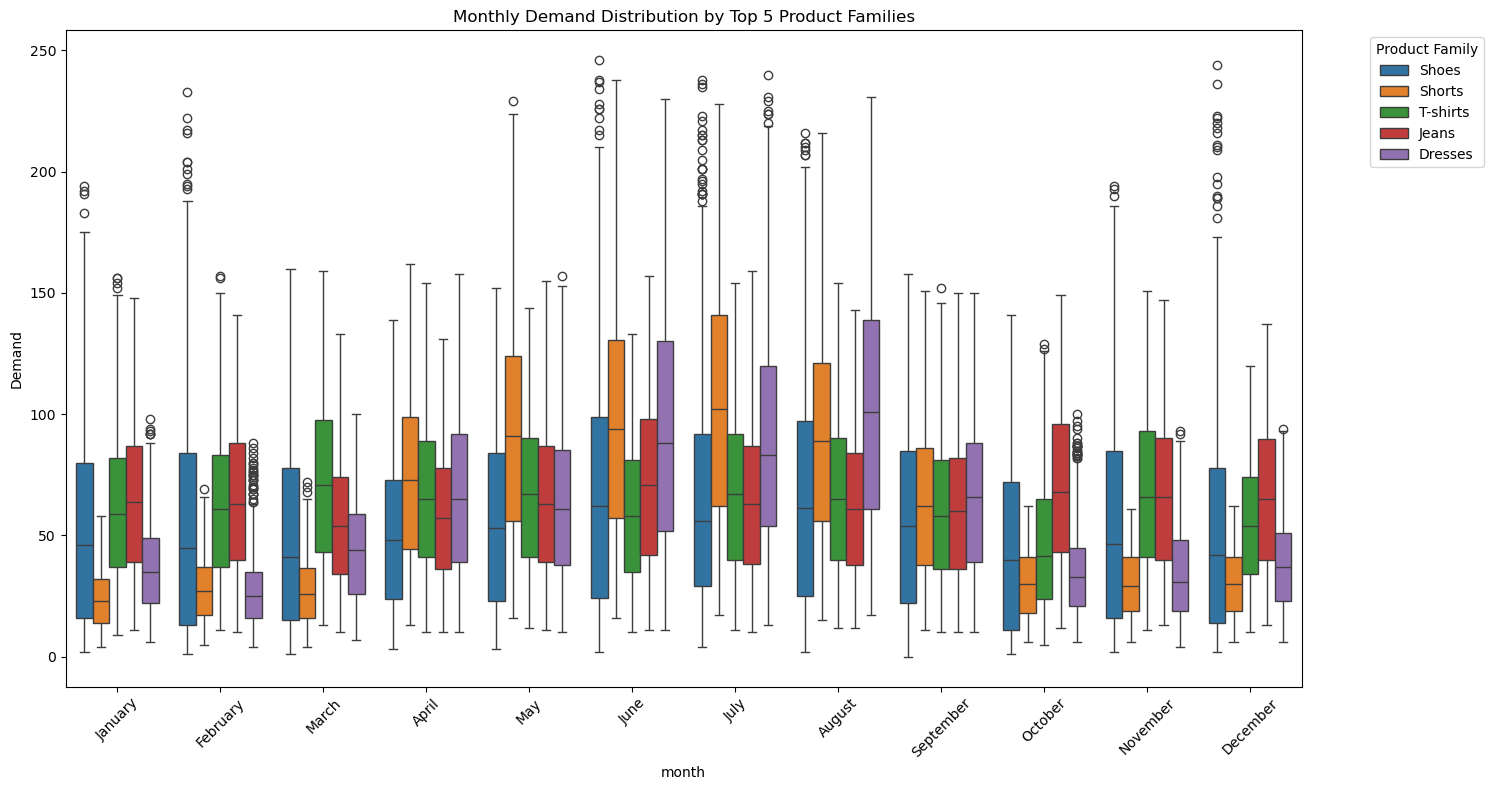


Total Demand by Product Family:
Jeans: 775,205
T-shirts: 760,560
Shorts: 695,111
Shoes: 673,384
Dresses: 566,264


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total demand by product family
total_demand_by_family = merged_df.groupby('Product Family')['Demand'].sum().sort_values(ascending=False)

# Get top 5 families
top_5_families = total_demand_by_family.head(5).index.tolist()

# Filter dataframe for only top 5 families
top_5_df = merged_df[merged_df['Product Family'].isin(top_5_families)]

# Create the plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_5_df, x='month', y='Demand', hue='Product Family')
plt.title('Monthly Demand Distribution by Top 5 Product Families')
plt.xticks(rotation=45)
plt.legend(title='Product Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print total demand for each family for reference
print("\nTotal Demand by Product Family:")
for family in top_5_families:
    total = total_demand_by_family[family]
    print(f"{family}: {total:,.0f}")

Through this heatmap we can see that the demand is higher in the summer months for most product families.

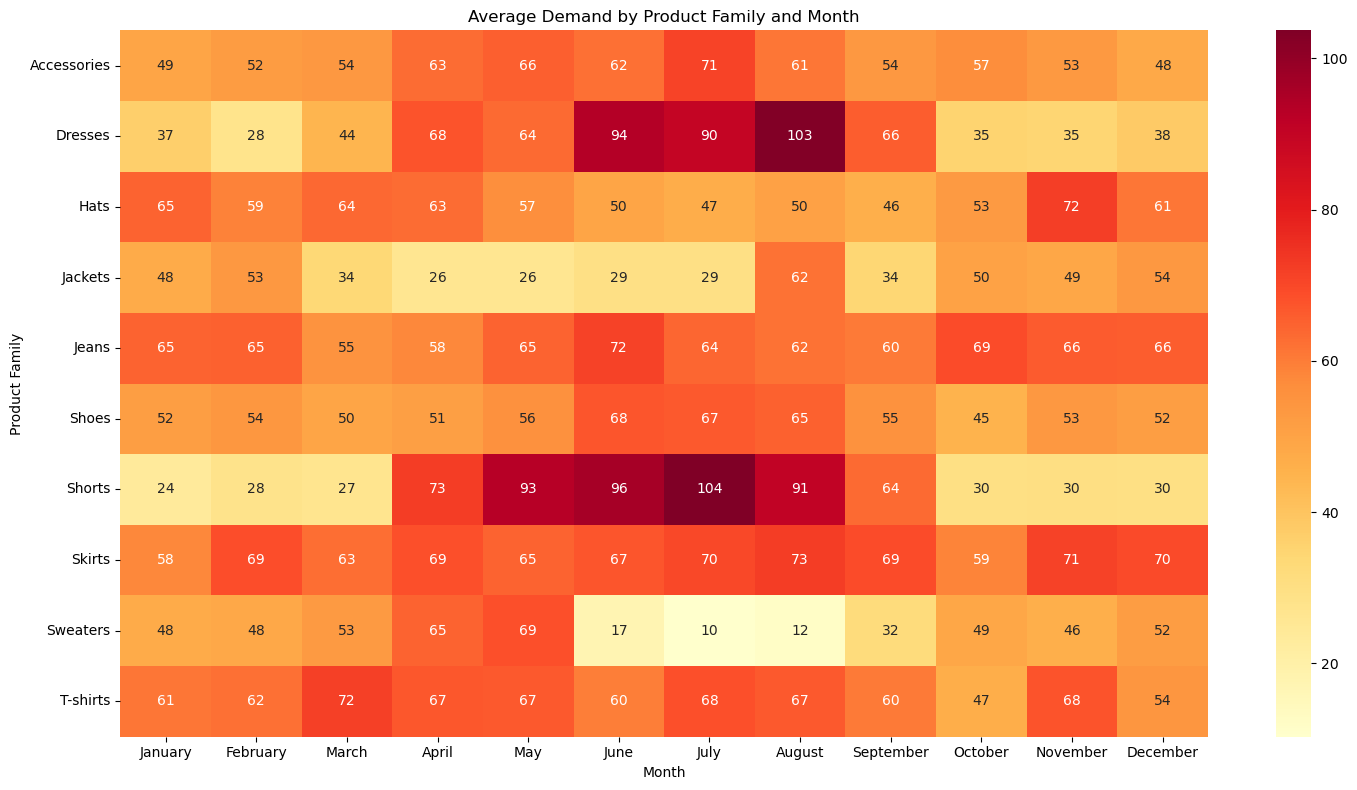

In [11]:
# Define month order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Create pivot table with correct column name and month ordering
pivot_family = pd.pivot_table(merged_df, 
                            values='Demand', 
                            index='Product Family', 
                            columns='month', 
                            aggfunc='mean')

# Reorder the columns according to months
pivot_family = pivot_family[months_order]

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_family, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Demand by Product Family and Month')
plt.xlabel('Month')
plt.ylabel('Product Family')
plt.tight_layout()
plt.show()

Let's now take a look at average demand by region and plot it in a map.

In [12]:
from folium import plugins

# Calculate average demand by store
store_avg_demand = merged_df.groupby('StoreID')['Demand'].mean().reset_index()

# Merge with stores data to get locations
map_data = store_avg_demand.merge(stores_df, on='StoreID', how='left')

# Create base map centered on US
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Calculate min and max demand for color scaling
min_demand = map_data['Demand'].min()
max_demand = map_data['Demand'].max()

# Add circles for each store, with color intensity based on demand
for idx, row in map_data.iterrows():
    # Scale the radius based on demand
    radius = float(row['Demand'])
    
    # Calculate color intensity (0 to 1)
    color_intensity = (row['Demand'] - min_demand) / (max_demand - min_demand)
    
    # Create color (from light red to dark red)
    color = f'#{int(255):02x}{int(255 * (1-color_intensity)):02x}{int(255 * (1-color_intensity)):02x}'
    
    # Create popup text
    popup_text = f"""
    Store: {row['StoreID']}<br>
    City: {row['City']}<br>
    Average Demand: {row['Demand']:.2f}
    """
    
    # Add circle
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius/10,
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
    ).add_to(m)

# Add a legend with adjusted height and formatting
title_html = '''
<div style="position: fixed; 
            top: 10px; 
            left: 50px; 
            width: 250px; 
            height: 90px; 
            background-color: white; 
            border:2px solid grey; 
            z-index:9999; 
            font-size:14px; 
            padding: 10px;
            line-height: 1.5;">
            <b>Store Demand Map</b><br>
            Circle size and color intensity indicate demand volume
</div>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m

# **Transhipment Optimization: First Approach**

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
print(os.getcwd())
import pandas as pd
import folium
import geopy
import math

c:\Users\k_pow\OneDrive\Documents\MIT\MITx SCM\IAP 2025\SCM275x\Assignment Files\DBSCAN


In [14]:
# Read the CSV files
facilities_df = pd.read_csv(path+'facilities.csv')
labor_cost_df = pd.read_csv(path+'labor_cost.csv')

# Clean up the Location column in both dataframes to ensure matching
# facilities_df already has "City, State" format
# labor_cost_df has the same format but with quotes that we need to remove
labor_cost_df['Location'] = labor_cost_df['Location'].str.replace('"', '')

# Merge the dataframes
merged_df = facilities_df.merge(labor_cost_df, 
                              on='Location', 
                              how='left')

# Find capacity per facility
merged_df['Capacity_per_pallet'] = round(merged_df['Size_SqFt'] / 25,0)

fac_df = merged_df

In [15]:
fac_df.head(5)

,FacilityID,Location,RentCost_SqFt,UtilitiesOpsCost_SqFt,Size_SqFt,Current,Local Labor Cost (USD/hour),Capacity_per_pallet
0,FAC001,"Denver, CO",8.7,5.7,50000,True,30.420,2000.0
1,FAC002,"Memphis, TN",6.5,3.6,80000,True,25.335,3200.0
2,FAC003,"Austin, TX",8.5,5.4,23000,False,21.030,920.0
3,FAC004,"Chicago, IL",8.5,5.5,50000,False,32.625,2000.0
4,FAC005,"Minneapolis, MN",10.5,6.8,45000,False,30.300,1800.0


In [16]:

# Import required libraries
import pandas as pd
import folium
import geopy
# Read the CSV files

#path = '/home/pcola/SCND_project/Data/'
path = "C:\\Users\\k_pow\\OneDrive\\Documents\\MIT\\MITx SCM\\IAP 2025\\SCM275x\\Assignment Files\\Data\\"
demand_df = pd.read_csv(path+'demand.csv')
products_df = pd.read_csv(path+'products.csv')
stores_df = pd.read_csv(path+'stores.csv')

# Merge demand with products using SKU
merged_df = demand_df.merge(products_df, 
                           on='SKU', 
                           how='left')

# Merge result with stores using StoreID
merged_df = merged_df.merge(stores_df, 
                           on='StoreID', 
                           how='left')

merged_df['Demand_per_pallet'] = merged_df['Demand'] / merged_df['SKUs/pallet']

prod_df = merged_df

In [17]:
#path = '/home/pcola/SCND_project/Data/'
rates_df = pd.read_csv(path+'rates.csv')
rates_df.head(5)

,Origin,Destination,Cost_FTL,Cost_LTL
0,"Memphis, TN",New York,4080.0,310.0
1,"Denver, CO",Los Angeles,3260.0,240.0
2,"Memphis, TN",Chicago,1950.0,150.0
3,"Memphis, TN",Houston,2150.0,170.0
4,"Denver, CO",Phoenix,2520.0,190.0


Now let's optimize the demand using the facilities and products data.

In [18]:
# First sum demand for each store per month, then take the average across months
annual_demand = (prod_df.groupby(['StoreID', 'month'])['Demand_per_pallet']
                .sum()  # Sum all SKUs for each store-month combination
                .groupby('StoreID')
                .mean()  # Take the average across months
                .round(0))  # Round to nearest integer

annual_demand = np.ceil(annual_demand)

print("Sample of annual average demand (pallets):")
print(annual_demand.head(120))

# Print some statistics to verify
print("\nDemand Statistics:")
print(f"Min demand: {annual_demand.min()} pallets")
print(f"Max demand: {annual_demand.max()} pallets")
print(f"Mean demand: {annual_demand.mean():.2f} pallets")
print(f"Total demand: {annual_demand.sum():.0f} pallets")

Sample of annual average demand (pallets):
StoreID
Store-001    16.0
Store-002     9.0
Store-003    14.0
Store-004    32.0
Store-005    25.0
             ... 
Store-116    18.0
Store-117     5.0
Store-118     3.0
Store-119    15.0
Store-120     9.0
Name: Demand_per_pallet, Length: 120, dtype: float64

Demand Statistics:
Min demand: 3.0 pallets
Max demand: 34.0 pallets
Mean demand: 16.05 pallets
Total demand: 3242 pallets


In [19]:
import gurobipy as gp
from gurobipy import GRB

# Parameters
# 1. Annual average demand in pallets per store
demand = annual_demand.to_dict()

# 2. Transportation costs
transport_costs = {}
for _, rate in rates_df.iterrows():
    origin_city = rate['Origin']
    dest_city = rate['Destination']
    cost = rate['Cost_FTL']  # Changed from Cost_LTL to Cost_FTL
    
    # Match facilities in this origin city
    origin_facilities = fac_df[fac_df['Location'] == origin_city]['FacilityID'].tolist()
    
    # Match stores in this destination city
    dest_stores = prod_df[prod_df['City'] == dest_city]['StoreID'].unique().tolist()
    
    # Create cost dictionary entries
    for fac in origin_facilities:
        for store in dest_stores:
            transport_costs[fac, store] = cost

# Sets
facilities = fac_df[fac_df['Current'] == True]['FacilityID'].tolist()
stores = annual_demand.index.tolist()

# First, identify which stores have valid routes from any active facility
valid_stores = set()
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            valid_stores.add(s)

valid_stores = list(valid_stores)

print("Model Coverage Analysis:")
print(f"Total stores: {len(stores)}")
print(f"Stores with valid routes: {len(valid_stores)}")
print(f"Stores without any valid routes: {len(stores) - len(valid_stores)}")
print("Active Facilities:", facilities)
print(f"Number of facilities: {len(facilities)}")
print(f"Number of stores: {len(stores)}")

Model Coverage Analysis:
Total stores: 202
Stores with valid routes: 202
Stores without any valid routes: 0
Active Facilities: ['FAC001', 'FAC002']
Number of facilities: 2
Number of stores: 202


In [20]:
# Create optimization model
model = gp.Model("Supply_Chain_Optimization")

# Decision Variables
x = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="ship")
trucks = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="trucks")

# Objective Function: Minimize total transportation cost using number of trucks
model.setObjective(
    gp.quicksum(
        transport_costs[f,s] * trucks[f,s]
        for f in facilities 
        for s in stores 
        if (f,s) in transport_costs
    ),
    GRB.MINIMIZE
)

Restricted license - for non-production use only - expires 2026-11-23


In [21]:
# Constraints
# 1. Meet all demand
for s in stores:
    model.addConstr(
        gp.quicksum(x[f,s] for f in facilities if (f,s) in transport_costs) == demand[s],
        f"Demand_{s}"
    )

# 2. Link pallets to number of trucks needed (26 pallets per truck)
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            model.addConstr(
                26 * trucks[f,s] >= x[f,s],
                f"Truck_capacity_{f}_{s}"
            )
# 2. Facility capacity constraints (annual)
for f in facilities:
    capacity = fac_df[fac_df['FacilityID'] == f]['Capacity_per_pallet'].iloc[0]
    model.addConstr(
        gp.quicksum(x[f,s] for s in stores if (f,s) in transport_costs) <= capacity,
        f"Capacity_{f}"
    )

In [22]:
# Optimize
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 406 rows, 808 columns and 808 nonzeros
Model fingerprint: 0xf9ef5b9e
Variable types: 0 continuous, 808 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [8e+02, 4e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+03]
Found heuristic solution: objective 560290.00000
Presolve removed 406 rows and 808 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 560290 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.602900000000e+05, best bound 5.602900000000e+05, gap 0.0000%


In [23]:
# Model size analysis
n_facilities = len(facilities)
n_stores = len(stores)

# Count all possible facility-store combinations
n_possible_routes = n_facilities * n_stores

# Count actual valid routes (where we have transportation costs)
n_valid_routes = sum(1 for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)

print("Model Size Statistics:")
print(f"Number of facilities: {n_facilities}")
print(f"Number of stores: {n_stores}")
print(f"Number of possible routes (facilities * stores): {n_possible_routes}")
print(f"Number of valid transportation routes (with costs): {n_valid_routes}")

# Decision Variables
n_variables = n_possible_routes  # One variable for each facility-store combination

# Constraints
n_demand_constraints = n_stores  # One constraint per store (demand satisfaction)
n_capacity_constraints = n_facilities  # One constraint per facility (capacity)
total_constraints = n_demand_constraints + n_capacity_constraints

print("\nModel Components:")
print(f"Number of decision variables: {n_variables}")
print(f"Number of constraints: {total_constraints}")

# Verify transport_costs dictionary
print("\nSample of transport_costs dictionary:")
sample_facility = facilities[0]
print(f"Routes from {sample_facility} to first 5 stores:")

Model Size Statistics:
Number of facilities: 2
Number of stores: 202
Number of possible routes (facilities * stores): 404
Number of valid transportation routes (with costs): 202

Model Components:
Number of decision variables: 404
Number of constraints: 204

Sample of transport_costs dictionary:
Routes from FAC001 to first 5 stores:


Remember to make n = 2 for the facilities

In [24]:
# Print results if optimal solution found
if model.status == GRB.OPTIMAL:
    print(f"\nOptimal Annual Cost: ${model.objVal:,.2f}")
    
    # Print flow details
    print("\nSelected Transportation Flows:")
    for f in facilities:
        for s in stores:
            if (f,s) in transport_costs and x[f,s].x > 0.01:  # Only print non-zero flows
                print(f"From {f} to {s}: {x[f,s].x:.2f} pallets")
                
    # Print facility utilization
    print("\nFacility Utilization:")
    for f in facilities:
        capacity = fac_df[fac_df['FacilityID'] == f]['Capacity_per_pallet'].iloc[0]
        used = sum(x[f,s].x for s in stores if (f,s) in transport_costs)
        util = (used/capacity)*100 if capacity > 0 else 0
        print(f"{f}: {used:.2f}/{capacity:.2f} pallets ({util:.1f}%)")


Optimal Annual Cost: $560,290.00

Selected Transportation Flows:
From FAC001 to Store-011: 20.00 pallets
From FAC001 to Store-012: 18.00 pallets
From FAC001 to Store-013: 12.00 pallets
From FAC001 to Store-014: 3.00 pallets
From FAC001 to Store-015: 15.00 pallets
From FAC001 to Store-016: 20.00 pallets
From FAC001 to Store-017: 5.00 pallets
From FAC001 to Store-018: 10.00 pallets
From FAC001 to Store-019: 11.00 pallets
From FAC001 to Store-020: 11.00 pallets
From FAC001 to Store-021: 17.00 pallets
From FAC001 to Store-022: 15.00 pallets
From FAC001 to Store-047: 7.00 pallets
From FAC001 to Store-048: 16.00 pallets
From FAC001 to Store-049: 5.00 pallets
From FAC001 to Store-050: 22.00 pallets
From FAC001 to Store-051: 13.00 pallets
From FAC001 to Store-052: 17.00 pallets
From FAC001 to Store-053: 6.00 pallets
From FAC001 to Store-054: 16.00 pallets
From FAC001 to Store-055: 22.00 pallets
From FAC001 to Store-056: 19.00 pallets
From FAC001 to Store-075: 18.00 pallets
From FAC001 to Stor

In [25]:
import folium
from folium import plugins

# Function to extract lat/long from location string
def get_coords_from_location(location_str):
    store_match = stores_df[stores_df['City'] == location_str.split(',')[0]]
    if len(store_match) > 0:
        return (store_match['Latitude'].iloc[0], store_match['Longitude'].iloc[0])
    else:
        print(f"Warning: No coordinates found for {location_str}")
        return None

# Create base map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Get coordinates for facilities and stores
facility_coords = {}
for f in facilities:
    facility_data = fac_df[fac_df['FacilityID'] == f].iloc[0]
    location = facility_data['Location']
    coords = get_coords_from_location(location)
    if coords:
        facility_coords[f] = coords

store_coords = {}
for s in stores:
    store_data = stores_df[stores_df['StoreID'] == s].iloc[0]
    store_coords[s] = (store_data['Latitude'], store_data['Longitude'])

# Find max flow and demand for scaling
max_flow = max(x[f,s].x for f in facilities for s in stores if (f,s) in transport_costs)
max_demand = max(demand.values())

# 1. First, add flows as lines with varying width and transparency
for f in facilities:
    if f in facility_coords:
        for s in stores:
            if s in store_coords and (f,s) in transport_costs and x[f,s].x > 0.01:
                width = 1 + (x[f,s].x / max_flow) * 7
                folium.PolyLine(
                    locations=[facility_coords[f], store_coords[s]],
                    weight=width,
                    color='gray',
                    opacity=0.3,
                    popup=f"Flow: {x[f,s].x:.1f} pallets"
                ).add_to(m)

# 2. Then add stores (as blue markers with size based on demand)
for s, coords in store_coords.items():
    size = 3 + (demand[s] / max_demand) * 7
    folium.CircleMarker(
        location=coords,
        radius=size,
        popup=f"{s}<br>Demand: {demand[s]:.1f} pallets",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# 3. Finally add facilities (as red markers)
for f, coords in facility_coords.items():
    folium.CircleMarker(
        location=coords,
        radius=12,
        popup=f"{f}",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(m)

# Add a legend with adjusted size, formatting, and position
legend_html = '''
<div style="
    position: fixed; 
    top: 20px; 
    right: 20px; 
    width: 180px; 
    background-color: rgba(255, 255, 255, 0.8);
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 12px; 
    padding: 10px;">
    <p style="margin: 0 0 5px 0;"><b>Network Flow Map</b></p>
    <p style="margin: 0 0 5px 0;"><span style="color: red;">●</span> Facilities</p>
    <p style="margin: 0 0 5px 0;"><span style="color: blue;">●</span> Stores (size = demand)</p>
    <p style="margin: 0;">Line width = flow volume</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Add new observations box
observations_html = '''
<div style="
    position: fixed; 
    top: 20px; 
    left: 10px; 
    width: 200px; 
    background-color: rgba(255, 255, 255, 0.8);
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 8px; 
    padding: 10px;">
    <p style="margin: 0 0 5px 0;"><b>Model Assumptions:</b></p>
    <ul style="margin: 0; padding-left: 20px;">
        <li>Considering only Truck_FTL costs</li>
        <li>Different SKUs can be used in same Pallet</li>
        <li>Aggregated demand by average monthly pallets</li>
        <li>Disregarded Facility capacity constraints</li>
    </ul>
</div>
'''
m.get_root().html.add_child(folium.Element(observations_html))

# Display the map
m

# **Facility Location Optimization: Open/ Close (considering 2 facilities)**

Import libraries

In [26]:
import pandas as pd
import folium
import geopy

Import data 

In [27]:
# Store data
# path = '/home/pcola/SCND_project/Data/'
demand_df = pd.read_csv(path+'demand.csv')
products_df = pd.read_csv(path+'products.csv')
stores_df = pd.read_csv(path+'stores.csv')

# Merge demand with products using SKU
merged_df = demand_df.merge(products_df, 
                           on='SKU', 
                           how='left')

# Merge result with stores using StoreID
merged_df = merged_df.merge(stores_df, 
                           on='StoreID', 
                           how='left')

merged_df['Demand_per_pallet'] = merged_df['Demand'] / merged_df['SKUs/pallet']

prod_df = merged_df

# Rates
# path = '/home/pcola/SCND_project/Data/'
rates_df = pd.read_csv(path+'rates.csv')

# Production
# Read the CSV files
# path = '/home/pcola/SCND_project/Data/'
facilities_df = pd.read_csv(path+'facilities.csv')
labor_cost_df = pd.read_csv(path+'labor_cost.csv')

# Clean up the Location column in both dataframes to ensure matching
# facilities_df already has "City, State" format
# labor_cost_df has the same format but with quotes that we need to remove
labor_cost_df['Location'] = labor_cost_df['Location'].str.replace('"', '')

# Merge the dataframes
merged_df = facilities_df.merge(labor_cost_df, 
                              on='Location', 
                              how='left')

# Find pallet capacity per facility
merged_df['Capacity_per_pallet'] = round(merged_df['Size_SqFt'] / 25,0)

# Calculate rent and utilities yearly cost per facility
merged_df['Rent_Utilities_cost'] = (merged_df['RentCost_SqFt'] + merged_df['UtilitiesOpsCost_SqFt'])*merged_df['Size_SqFt']

fac_df = merged_df

In [28]:
# Parameters
# 1. Annual average demand in pallets per store
demand = annual_demand.to_dict()

# 2. Transportation costs
transport_costs = {}
for _, rate in rates_df.iterrows():
    origin_city = rate['Origin']
    dest_city = rate['Destination']
    cost = rate['Cost_FTL']  # Changed from Cost_LTL to Cost_FTL
    
    # Match facilities in this origin city
    origin_facilities = fac_df[fac_df['Location'] == origin_city]['FacilityID'].tolist()
    
    # Match stores in this destination city
    dest_stores = prod_df[prod_df['City'] == dest_city]['StoreID'].unique().tolist()
    
    # Create cost dictionary entries
    for fac in origin_facilities:
        for store in dest_stores:
            transport_costs[fac, store] = cost

# Sets
facilities = fac_df[fac_df['Current'] == True]['FacilityID'].tolist()
stores = annual_demand.index.tolist()

# Get fixed costs for facilities
fixed_costs = {f: fac_df.loc[fac_df['FacilityID'] == f, 'Rent_Utilities_cost'].iloc[0] 
               for f in facilities}

In [29]:
# Create optimization model
model = gp.Model("Supply_Chain_Optimization")

# Decision Variables
x = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="ship")
trucks = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="trucks")

# Binary variable for opening facilities
y = model.addVars(facilities, vtype=GRB.BINARY, name="open")  

# Objective Function: Minimize total transportation cost using number of trucks

model.setObjective(
    # Transportation cost (monthly) then multiply by 12 for annual
    gp.quicksum(
        transport_costs[f,s] * trucks[f,s]
        for f in facilities 
        for s in stores 
        if (f,s) in transport_costs)*12 +
    
    # Fixed costs (yearly)
    gp.quicksum(fixed_costs[f] * y[f] 
                for f in facilities),
    
    GRB.MINIMIZE
)

In [30]:
# Constraints
# 1. Meet all demand
for s in stores:
    model.addConstr(
        gp.quicksum(x[f,s] for f in facilities if (f,s) in transport_costs) == demand[s],
        f"Demand_{s}"
    )

# 2. Link pallets to number of trucks needed (26 pallets per truck)
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            model.addConstr(
                26 * trucks[f,s] >= x[f,s],
                f"Truck_capacity_{f}_{s}"
            )
# 3. Can only ship from open facilities
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            model.addConstr(
                x[f,s] <= demand[s] * y[f],  # Using demand[s] as a big-M value
                f"Open_facility_{f}_{s}"
            )

# 4. Facility capacity constraints
for f in facilities:
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    model.addConstr(
        gp.quicksum(x[f,s] for s in stores if (f,s) in transport_costs) <= capacity * y[f],
        f"Capacity_{f}"
    )

In [31]:
# Optimize
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 608 rows, 810 columns and 1214 nonzeros
Model fingerprint: 0x8c5429b4
Variable types: 0 continuous, 810 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [9e+03, 8e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+01]
Found heuristic solution: objective 8251480.0000
Presolve removed 608 rows and 810 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 8.25148e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.251480000000e+06, best bound 8.251480000000e+06, gap 0.0000%


In [32]:
import folium
from folium import plugins

# Function to extract lat/long from location string
def get_coords_from_location(location_str):
    store_match = stores_df[stores_df['City'] == location_str.split(',')[0]]
    if len(store_match) > 0:
        return (store_match['Latitude'].iloc[0], store_match['Longitude'].iloc[0])
    else:
        print(f"Warning: No coordinates found for {location_str}")
        return None

# Create base map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Get coordinates for facilities and stores
facility_coords = {}
for f in facilities:
    facility_data = fac_df[fac_df['FacilityID'] == f].iloc[0]
    location = facility_data['Location']
    coords = get_coords_from_location(location)
    if coords:
        facility_coords[f] = coords

store_coords = {}
for s in stores:
    store_data = stores_df[stores_df['StoreID'] == s].iloc[0]
    store_coords[s] = (store_data['Latitude'], store_data['Longitude'])

# Find max flow and demand for scaling
max_flow = max(x[f,s].x for f in facilities for s in stores if (f,s) in transport_costs)
max_demand = max(demand.values())

# 1. Add flows as lines (smaller width, gray color)
for f in facilities:
    if f in facility_coords and y[f].x > 0.5:  # Only show flows from open facilities
        for s in stores:
            if s in store_coords and (f,s) in transport_costs and x[f,s].x > 0.01:
                # Calculate line width based on flow volume (reduced scale)
                width = 0.5 + (x[f,s].x / max_flow) * 2  # Reduced multiplier from 7 to 2
                
                folium.PolyLine(
                    locations=[facility_coords[f], store_coords[s]],
                    weight=width,
                    color='gray',
                    opacity=0.4,
                    popup=f"""
                    Pallets: {x[f,s].x:.1f}<br>
                    Trucks: {trucks[f,s].x}<br>
                    Cost: ${transport_costs[f,s] * trucks[f,s].x:,.0f}
                    """
                ).add_to(m)

# 2. Add stores (blue markers with size based on demand)
for s, coords in store_coords.items():
    size = 3 + (demand[s] / max_demand) * 7
    folium.CircleMarker(
        location=coords,
        radius=size,
        popup=f"{s}<br>Demand: {demand[s]:.1f}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# 3. Add facilities (red/gray markers based on if they're open)
for f, coords in facility_coords.items():
    is_open = y[f].x > 0.5
    color = 'red' if is_open else 'gray'
    
    # Calculate facility utilization if open
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    used = sum(x[f,s].x for s in stores if (f,s) in transport_costs) if is_open else 0
    util = (used/capacity)*100 if capacity > 0 else 0
    
    popup_text = f"""
    {f}<br>
    {'Open' if is_open else 'Closed'}<br>
    Cost: ${fixed_costs[f]:,.0f}<br>
    {'Utilization: ' + f'{util:.1f}% of {capacity:.0f} pallets' if is_open else ''}<br>
    """
    
    folium.CircleMarker(
        location=coords,
        radius=12,
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Add a simplified legend
legend_html = '''
<div style="
    position: fixed; 
    top: 10px; 
    right: 10px; 
    width: 120px; 
    background-color: rgba(255, 255, 255, 0.9);
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 10px; 
    padding: 8px;">
    <p style="margin: 0 0 3px 0;"><b>Network Flow Map</b></p>
    <p style="margin: 0 0 3px 0;"><span style="color: red;">●</span> Open Facilities</p>
    <p style="margin: 0 0 3px 0;"><span style="color: gray;">●</span> Closed Facilities</p>
    <p style="margin: 0;"><span style="color: blue;">●</span> Stores</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Add simplified summary box
total_transport_cost = sum(transport_costs[f,s] * trucks[f,s].x 
                          for f in facilities 
                          for s in stores 
                          if (f,s) in transport_costs and x[f,s].x > 0.01)
total_fixed_cost = sum(fixed_costs[f] * y[f].x for f in facilities)

summary_html = f'''
<div style="
    position: fixed; 
    top: 10px; 
    left: 120px; 
    width: 120px; 
    background-color: rgba(255, 255, 255, 0.9);
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 10px; 
    padding: 8px;">
    <p style="margin: 0 0 3px 0;"><b>Cost Summary</b></p>
    <p style="margin: 0;">Transport: ${total_transport_cost:,.0f}</p>
    <p style="margin: 0;">Fixed: ${total_fixed_cost:,.0f}</p>
    <p style="margin: 0;"><b>Total: ${model.objVal:,.0f}</b></p>
</div>
'''
m.get_root().html.add_child(folium.Element(summary_html))

# Display the map
m

In [33]:
# Model size analysis
n_facilities = len(facilities)
n_stores = len(stores)

# Count all possible facility-store combinations
n_possible_routes = n_facilities * n_stores

# Count actual valid routes (where we have transportation costs)
n_valid_routes = sum(1 for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)

print("Model Size Statistics:")
print(f"Number of facilities: {n_facilities}")
print(f"Number of stores: {n_stores}")
print(f"Number of possible routes (facilities * stores): {n_possible_routes}")
print(f"Number of valid transportation routes (with costs): {n_valid_routes}")

# Decision Variables
n_facility_vars = n_facilities  # Binary variables for facility opening
n_flow_vars = n_valid_routes   # Flow variables for valid routes
n_truck_vars = n_valid_routes  # Truck variables for valid routes
total_vars = n_facility_vars + n_flow_vars + n_truck_vars

# Constraints
n_demand_constraints = n_stores  # One constraint per store (demand satisfaction)
n_capacity_constraints = n_facilities  # One constraint per facility (capacity)
n_truck_link_constraints = n_valid_routes  # Linking flows to trucks
n_open_facility_constraints = n_valid_routes  # Can only ship from open facilities
total_constraints = (n_demand_constraints + n_capacity_constraints + 
                    n_truck_link_constraints + n_open_facility_constraints)

print("\nModel Components:")
print(f"Number of decision variables: {total_vars}")
print("  - Facility opening variables:", n_facility_vars)
print("  - Flow variables:", n_flow_vars)
print("  - Truck variables:", n_truck_vars)
print(f"\nNumber of constraints: {total_constraints}")
print("  - Demand satisfaction:", n_demand_constraints)
print("  - Capacity constraints:", n_capacity_constraints)
print("  - Truck-flow linking:", n_truck_link_constraints)
print("  - Open facility constraints:", n_open_facility_constraints)

Model Size Statistics:
Number of facilities: 2
Number of stores: 202
Number of possible routes (facilities * stores): 404
Number of valid transportation routes (with costs): 202

Model Components:
Number of decision variables: 406
  - Facility opening variables: 2
  - Flow variables: 202
  - Truck variables: 202

Number of constraints: 608
  - Demand satisfaction: 202
  - Capacity constraints: 2
  - Truck-flow linking: 202
  - Open facility constraints: 202


In [34]:
# Facility decisions
open_facilities = [f for f in facilities if y[f].x > 0.5]
print(f"\nNumber of open facilities: {len(open_facilities)}")

# Cost breakdown
total_transport_cost = sum(transport_costs[f,s] * trucks[f,s].x 
                            for f in facilities 
                            for s in stores 
                            if (f,s) in transport_costs)*12
total_fixed_cost = sum(fixed_costs[f] * y[f].x for f in facilities)

print(f"\nCost Breakdown:")
print(f"Transportation cost: ${total_transport_cost:,.2f} ({total_transport_cost/model.objVal*100:.1f}%)")
print(f"Fixed facility cost: ${total_fixed_cost:,.2f} ({total_fixed_cost/model.objVal*100:.1f}%)")
print(f"Total cost: ${model.objVal:,.2f}")


Number of open facilities: 2

Cost Breakdown:
Transportation cost: $6,723,480.00 (81.5%)
Fixed facility cost: $1,528,000.00 (18.5%)
Total cost: $8,251,480.00


In [35]:
# Facility utilization
print("\nFacility Utilization:")
for f in open_facilities:
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    used = sum(x[f,s].x for s in stores if (f,s) in transport_costs)
    util = (used/capacity)*100
    print(f"{f}:")
    print(f"  Capacity: {capacity:,.0f} pallets")
    print(f"  Used: {used:,.0f} pallets")
    print(f"  Utilization: {util:.1f}%")
    print(f"  Fixed cost: ${fixed_costs[f]:,.2f}")


Facility Utilization:
FAC001:
  Capacity: 2,000 pallets
  Used: 1,190 pallets
  Utilization: 59.5%
  Fixed cost: $720,000.00
FAC002:
  Capacity: 3,200 pallets
  Used: 2,052 pallets
  Utilization: 64.1%
  Fixed cost: $808,000.00


In [36]:
# Transportation statistics
total_pallets = sum(x[f,s].x 
                    for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)
total_trucks = sum(trucks[f,s].x 
                    for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)

print("\nTransportation Statistics:")
print(f"Total pallets shipped: {total_pallets:,.0f}")
print(f"Total trucks used: {total_trucks:,.0f}")
print(f"Average truck utilization: {(total_pallets/(total_trucks*26))*100:.1f}%")
print(f"Average cost per pallet: ${total_transport_cost/total_pallets:,.2f}")
print(f"Average cost per truck: ${total_transport_cost/total_trucks:,.2f}")


Transportation Statistics:
Total pallets shipped: 3,242
Total trucks used: 222
Average truck utilization: 56.2%
Average cost per pallet: $2,073.87
Average cost per truck: $30,285.95


# **Facility Location Optimization: Open/ Close (considering 2 facilities) + Labor Cost (variable cost per pallet)**

In [37]:
import pandas as pd
import folium
import geopy
import gurobipy as gp
from gurobipy import GRB

In [38]:
# Store data
# path = '/home/pcola/SCND_project/Data/'
demand_df = pd.read_csv(path+'demand.csv')
products_df = pd.read_csv(path+'products.csv')
stores_df = pd.read_csv(path+'stores.csv')

# Merge demand with products using SKU
merged_df = demand_df.merge(products_df, 
                           on='SKU', 
                           how='left')

# Merge result with stores using StoreID
merged_df = merged_df.merge(stores_df, 
                           on='StoreID', 
                           how='left')

merged_df['Demand_per_pallet'] = merged_df['Demand'] / merged_df['SKUs/pallet']

prod_df = merged_df

# Rates
# path = '/home/pcola/SCND_project/Data/'
rates_df = pd.read_csv(path+'rates.csv')

# Production
# Read the CSV files
# path = '/home/pcola/SCND_project/Data/'
facilities_df = pd.read_csv(path+'facilities.csv')
labor_cost_df = pd.read_csv(path+'labor_cost.csv')

# Clean up the Location column in both dataframes to ensure matching
# facilities_df already has "City, State" format
# labor_cost_df has the same format but with quotes that we need to remove
labor_cost_df['Location'] = labor_cost_df['Location'].str.replace('"', '')

# Merge the dataframes
merged_df = facilities_df.merge(labor_cost_df, 
                              on='Location', 
                              how='left')

# Find pallet capacity per facility
merged_df['Capacity_per_pallet'] = round(merged_df['Size_SqFt'] / 25,0)

# Calculate rent and utilities yearly cost per facility
merged_df['Rent_Utilities_cost'] = (merged_df['RentCost_SqFt'] + merged_df['UtilitiesOpsCost_SqFt'])*merged_df['Size_SqFt']

fac_df = merged_df

In [39]:
# Parameters
# 1. Annual average demand in pallets per store
demand = annual_demand.to_dict()

# 2. Transportation costs
transport_costs = {}
for _, rate in rates_df.iterrows():
    origin_city = rate['Origin']
    dest_city = rate['Destination']
    cost = rate['Cost_FTL']  # Changed from Cost_LTL to Cost_FTL
    
    # Match facilities in this origin city
    origin_facilities = fac_df[fac_df['Location'] == origin_city]['FacilityID'].tolist()
    
    # Match stores in this destination city
    dest_stores = prod_df[prod_df['City'] == dest_city]['StoreID'].unique().tolist()
    
    # Create cost dictionary entries
    for fac in origin_facilities:
        for store in dest_stores:
            transport_costs[fac, store] = cost

# Sets
facilities = fac_df[fac_df['Current'] == True]['FacilityID'].tolist()
stores = annual_demand.index.tolist()

# Get fixed costs for facilities
fixed_costs = {f: fac_df.loc[fac_df['FacilityID'] == f, 'Rent_Utilities_cost'].iloc[0] 
               for f in facilities}

# Calculate labor hours needed per pallet
time_per_pallet = 1  # 30min load + 30min unload = 1 hour total
efficiency_factor = 1/0.8  # 80% efficiency means we divide by 0.8

# Create dictionary of labor costs per pallet for each facility
labor_costs_per_pallet = {}
for f in facilities:
    hourly_rate = fac_df.loc[fac_df['FacilityID'] == f, 'Local Labor Cost (USD/hour)'].iloc[0]
    labor_costs_per_pallet[f] = hourly_rate * time_per_pallet * efficiency_factor

In [40]:
# Create optimization model
model = gp.Model("Supply_Chain_Optimization")

# Decision Variables
x = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="ship")
trucks = model.addVars(facilities, stores, vtype=GRB.INTEGER, name="trucks")

# Binary variable for opening facilities
y = model.addVars(facilities, vtype=GRB.BINARY, name="open")  

# Objective Function: Minimize total transportation cost using number of trucks
# Update model objective to reflect yearly costs
model.setObjective(
    # Transportation costs (yearly)
    gp.quicksum(transport_costs[f,s] * trucks[f,s]
                for f in facilities 
                for s in stores 
                if (f,s) in transport_costs)*12 +
    # Fixed facility costs (already yearly)
    gp.quicksum(fixed_costs[f] * y[f] 
                for f in facilities) +
    # Labor costs (yearly)
    gp.quicksum(labor_costs_per_pallet[f] * x[f,s]
                for f in facilities 
                for s in stores 
                if (f,s) in transport_costs)*12,
    GRB.MINIMIZE
)

In [41]:
# Constraints
# 1. Meet all demand
for s in stores:
    model.addConstr(
        gp.quicksum(x[f,s] for f in facilities if (f,s) in transport_costs) == demand[s],
        f"Demand_{s}"
    )

# 2. Link pallets to number of trucks needed (26 pallets per truck)
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            model.addConstr(
                26 * trucks[f,s] >= x[f,s],
                f"Truck_capacity_{f}_{s}"
            )
# 3. Can only ship from open facilities
for f in facilities:
    for s in stores:
        if (f,s) in transport_costs:
            model.addConstr(
                x[f,s] <= demand[s] * y[f],  # Using demand[s] as a big-M value
                f"Open_facility_{f}_{s}"
            )

# 4. Facility capacity constraints
for f in facilities:
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    model.addConstr(
        gp.quicksum(x[f,s] for s in stores if (f,s) in transport_costs) <= capacity * y[f],
        f"Capacity_{f}"
    )

In [42]:
# Optimize
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 608 rows, 810 columns and 1214 nonzeros
Model fingerprint: 0xf18f9374
Variable types: 0 continuous, 810 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [4e+02, 8e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+01]
Found heuristic solution: objective 9574288.3000
Presolve removed 608 rows and 810 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 9.57429e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.574288300000e+06, best bound 9.574288300000e+06, gap 0.0000%


In [43]:
import folium
from folium import plugins

# Function to extract lat/long from location string
def get_coords_from_location(location_str):
    store_match = stores_df[stores_df['City'] == location_str.split(',')[0]]
    if len(store_match) > 0:
        return (store_match['Latitude'].iloc[0], store_match['Longitude'].iloc[0])
    else:
        print(f"Warning: No coordinates found for {location_str}")
        return None

# Create base map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Get coordinates for facilities and stores
facility_coords = {}
for f in facilities:
    facility_data = fac_df[fac_df['FacilityID'] == f].iloc[0]
    location = facility_data['Location']
    coords = get_coords_from_location(location)
    if coords:
        facility_coords[f] = coords

store_coords = {}
for s in stores:
    store_data = stores_df[stores_df['StoreID'] == s].iloc[0]
    store_coords[s] = (store_data['Latitude'], store_data['Longitude'])

# Find max flow and demand for scaling
max_flow = max(x[f,s].x for f in facilities for s in stores if (f,s) in transport_costs)
max_demand = max(demand.values())

# 1. Add flows as lines (smaller width, gray color)
for f in facilities:
    if f in facility_coords and y[f].x > 0.5:  # Only show flows from open facilities
        for s in stores:
            if s in store_coords and (f,s) in transport_costs and x[f,s].x > 0.01:
                # Calculate line width based on flow volume (reduced scale)
                width = 0.5 + (x[f,s].x / max_flow) * 2  # Reduced multiplier from 7 to 2
                
                folium.PolyLine(
                    locations=[facility_coords[f], store_coords[s]],
                    weight=width,
                    color='gray',
                    opacity=0.4,
                    popup=f"""
                    Pallets: {x[f,s].x:.1f}<br>
                    Trucks: {trucks[f,s].x}<br>
                    Cost: ${transport_costs[f,s] * trucks[f,s].x:,.0f}
                    """
                ).add_to(m)

# 2. Add stores (blue markers with size based on demand)
for s, coords in store_coords.items():
    size = 3 + (demand[s] / max_demand) * 7
    folium.CircleMarker(
        location=coords,
        radius=size,
        popup=f"{s}<br>Demand: {demand[s]:.1f}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# 3. Add facilities (red/gray markers based on if they're open)
for f, coords in facility_coords.items():
    is_open = y[f].x > 0.5
    color = 'red' if is_open else 'gray'
    
    # Calculate facility utilization if open
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    used = sum(x[f,s].x for s in stores if (f,s) in transport_costs) if is_open else 0
    util = (used/capacity)*100 if capacity > 0 else 0
    
    # Update facility popup text
    facility_labor_cost = sum(labor_costs_per_pallet[f] * x[f,s].x 
                            for s in stores 
                            if (f,s) in transport_costs) if is_open else 0
    
    popup_text = f"""
    {f}<br>
    {'Open' if is_open else 'Closed'}<br>
    Fixed Cost: ${fixed_costs[f]:,.0f}<br>
    {'Labor Cost: $' + f'{facility_labor_cost*12:,.0f}<br>' if is_open else ''}
    {'Utilization: ' + f'{util:.1f}%<br>' if is_open else ''}
    {'Used: ' + f'{used:.0f}/{capacity:.0f} pallets' if is_open else ''}
    """
    
    folium.CircleMarker(
        location=coords,
        radius=12,
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Add a simplified legend
# legend_html = '''
# <div style="
#     position: fixed; 
#     top: 10px; 
#     right: 10px; 
#     width: 120px; 
#     background-color: rgba(255, 255, 255, 0.9);
#     border: 2px solid grey; 
#     z-index: 9999; 
#     font-size: 8px; 
#     padding: 6px;">
#     <p style="margin: 0 0 2px 0;"><b>Network Flow Map</b></p>
#     <p style="margin: 0 0 2px 0;"><span style="color: red;">●</span> Open Facilities</p>
#     <p style="margin: 0 0 2px 0;"><span style="color: gray;">●</span> Closed Facilities</p>
#     <p style="margin: 0;"><span style="color: blue;">●</span> Stores</p>
# </div>
# '''
m.get_root().html.add_child(folium.Element(legend_html))

# Add cost summary box
# summary_html = f'''
# <div style="
#     position: fixed; 
#     top: 10px; 
#     right: 140px; 
#     width: 120px; 
#     background-color: rgba(255, 255, 255, 0.9);
#     border: 2px solid grey; 
#     z-index: 9999; 
#     font-size: 8px; 
#     padding: 6px;">
#     <p style="margin: 0 0 2px 0;"><b>Cost Summary (yearly)</b></p>
#     <p style="margin: 0;">Transportation: ${yearly_transport_cost:,.0f}</p>
#     <p style="margin: 0;">Rent & Utilities: ${total_fixed_cost:,.0f}</p>
#     <p style="margin: 0;">Workforce: ${yearly_workforce_cost:,.0f}</p>
#     <p style="margin: 0;"><b>Total: ${model.objVal:,.0f}</b></p>
# </div>
# '''
m.get_root().html.add_child(folium.Element(summary_html))

# Display the map
m

In [44]:
# Model size analysis
n_facilities = len(facilities)
n_stores = len(stores)

# Count all possible facility-store combinations
n_possible_routes = n_facilities * n_stores

# Count actual valid routes (where we have transportation costs)
n_valid_routes = sum(1 for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)

# Calculate labor parameters
HOURS_PER_DAY = 8
DAYS_PER_MONTH = 22
HOURS_PER_YEAR = HOURS_PER_DAY * DAYS_PER_MONTH * 12  # Changed to yearly hours
EFFICIENCY = 0.8
TIME_PER_PALLET = 1  # 30min load + 30min unload = 1 hour total
EFFECTIVE_TIME_PER_PALLET = TIME_PER_PALLET / EFFICIENCY  # Actual time needed with efficiency factor

# Create dictionary of labor costs per pallet for each facility
labor_costs_per_pallet = {}
for f in facilities:
    hourly_rate = fac_df.loc[fac_df['FacilityID'] == f, 'Local Labor Cost (USD/hour)'].iloc[0]
    labor_costs_per_pallet[f] = hourly_rate * EFFECTIVE_TIME_PER_PALLET


print("Model Size Statistics:")
print(f"Number of facilities: {n_facilities}")
print(f"Number of stores: {n_stores}")
print(f"Number of possible routes (facilities * stores): {n_possible_routes}")
print(f"Number of valid transportation routes (with costs): {n_valid_routes}")

# Decision Variables
n_facility_vars = n_facilities  # Binary variables for facility opening
n_flow_vars = n_valid_routes   # Flow variables for valid routes
n_truck_vars = n_valid_routes  # Truck variables for valid routes
total_vars = n_facility_vars + n_flow_vars + n_truck_vars

# Constraints
n_demand_constraints = n_stores  # One constraint per store (demand satisfaction)
n_capacity_constraints = n_facilities  # One constraint per facility (capacity)
n_truck_link_constraints = n_valid_routes  # Linking flows to trucks
n_open_facility_constraints = n_valid_routes  # Can only ship from open facilities
total_constraints = (n_demand_constraints + n_capacity_constraints + 
                    n_truck_link_constraints + n_open_facility_constraints)

print("\nModel Components:")
print(f"Number of decision variables: {total_vars}")
print("  - Facility opening variables:", n_facility_vars)
print("  - Flow variables:", n_flow_vars)
print("  - Truck variables:", n_truck_vars)
print(f"\nNumber of constraints: {total_constraints}")
print("  - Demand satisfaction:", n_demand_constraints)
print("  - Capacity constraints:", n_capacity_constraints)
print("  - Truck-flow linking:", n_truck_link_constraints)
print("  - Open facility constraints:", n_open_facility_constraints)

Model Size Statistics:
Number of facilities: 2
Number of stores: 202
Number of possible routes (facilities * stores): 404
Number of valid transportation routes (with costs): 202

Model Components:
Number of decision variables: 406
  - Facility opening variables: 2
  - Flow variables: 202
  - Truck variables: 202

Number of constraints: 608
  - Demand satisfaction: 202
  - Capacity constraints: 2
  - Truck-flow linking: 202
  - Open facility constraints: 202


In [45]:
# Facility decisions
open_facilities = [f for f in facilities if y[f].x > 0.5]
print(f"\nNumber of open facilities: {len(open_facilities)}")

# Cost breakdown
total_transport_cost = sum(transport_costs[f,s] * trucks[f,s].x 
                            for f in facilities 
                            for s in stores 
                            if (f,s) in transport_costs)*12
total_fixed_cost = sum(fixed_costs[f] * y[f].x for f in facilities)

print(f"\nCost Breakdown:")
print(f"Transportation cost: ${total_transport_cost:,.2f} ({total_transport_cost/model.objVal*100:.1f}%)")
print(f"Fixed facility cost: ${total_fixed_cost:,.2f} ({total_fixed_cost/model.objVal*100:.1f}%)")
print(f"Total cost: ${model.objVal:,.2f}")


Number of open facilities: 2

Cost Breakdown:
Transportation cost: $6,723,480.00 (70.2%)
Fixed facility cost: $1,528,000.00 (16.0%)
Total cost: $9,574,288.30


In [46]:
# Facility Utilization and Costs
print("\nFacility Utilization and Costs:")
for f in open_facilities:
    capacity = fac_df.loc[fac_df['FacilityID'] == f, 'Capacity_per_pallet'].iloc[0]
    used = sum(x[f,s].x for s in stores if (f,s) in transport_costs)
    util = (used/capacity)*100
    facility_labor_cost = sum(labor_costs_per_pallet[f] * x[f,s].x 
                            for s in stores 
                            if (f,s) in transport_costs)
    
    print(f"{f}:")
    print(f"  Capacity: {capacity:,.0f} pallets")
    print(f"  Used: {used:,.0f} pallets")
    print(f"  Utilization: {util:.1f}%")
    print(f"  Fixed cost: ${fixed_costs[f]:,.2f}")
    print(f"  Labor cost: ${facility_labor_cost:,.2f}")
    print(f"  Labor cost per pallet: ${labor_costs_per_pallet[f]:.2f}")


Facility Utilization and Costs:
FAC001:
  Capacity: 2,000 pallets
  Used: 1,190 pallets
  Utilization: 59.5%
  Fixed cost: $720,000.00
  Labor cost: $45,249.75
  Labor cost per pallet: $38.03
FAC002:
  Capacity: 3,200 pallets
  Used: 2,052 pallets
  Utilization: 64.1%
  Fixed cost: $808,000.00
  Labor cost: $64,984.28
  Labor cost per pallet: $31.67


In [47]:
# Transportation statistics
total_pallets = sum(x[f,s].x 
                    for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)
total_trucks = sum(trucks[f,s].x 
                    for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs)

print("\nTransportation Statistics:")
print(f"Total pallets shipped: {total_pallets:,.0f}")
print(f"Total trucks used: {total_trucks:,.0f}")
print(f"Average truck utilization: {(total_pallets/(total_trucks*26))*100:.1f}%")
print(f"Average cost per pallet: ${total_transport_cost/total_pallets:,.2f}")
print(f"Average cost per truck: ${total_transport_cost/total_trucks:,.2f}")


Transportation Statistics:
Total pallets shipped: 3,242
Total trucks used: 222
Average truck utilization: 56.2%
Average cost per pallet: $2,073.87
Average cost per truck: $30,285.95


In [48]:
# Calculate labor parameters
HOURS_PER_DAY = 8
DAYS_PER_MONTH = 22
HOURS_PER_YEAR = HOURS_PER_DAY * DAYS_PER_MONTH * 12  # 2,112 hours per year per worker
EFFICIENCY = 0.8
TIME_PER_PALLET = 1  # 30min load + 30min unload = 1 hour total
EFFECTIVE_TIME_PER_PALLET = TIME_PER_PALLET / EFFICIENCY  # 1.25 hours per pallet

if model.status == GRB.OPTIMAL:
    print("\nWorkforce Analysis:")
    for f in facilities:
        if y[f].x > 0.5:  # Only for open facilities
            # Calculate yearly pallets handled
            yearly_pallets = sum(x[f,s].x for s in stores if (f,s) in transport_costs) * 12
            
            # Calculate total required work hours per year
            required_hours = yearly_pallets * EFFECTIVE_TIME_PER_PALLET
            
            # Calculate number of workers needed
            # Each worker has 2,112 available hours per year
            workers_needed = math.ceil(required_hours / HOURS_PER_YEAR)
            
            # Calculate actual worker utilization based on required vs available hours
            worker_utilization = (required_hours / (workers_needed * HOURS_PER_YEAR)) * 100
            
            # Calculate yearly labor cost
            hourly_rate = fac_df.loc[fac_df['FacilityID'] == f, 'Local Labor Cost (USD/hour)'].iloc[0]
            facility_labor_cost = required_hours * hourly_rate
            
            print(f"\nFacility {f}:")
            print(f"  Yearly pallets: {yearly_pallets:,.0f}")
            print(f"  Required work hours: {required_hours:,.1f} hours/year")
            print(f"  Available hours per worker: {HOURS_PER_YEAR:,.0f}")
            print(f"  Workers needed: {workers_needed}")
            print(f"  Worker utilization: {worker_utilization:.1f}%")
            print(f"  Hourly rate: ${hourly_rate:.2f}")
            print(f"  Yearly labor cost: ${facility_labor_cost:,.2f}")
            print(f"  Cost per worker: ${facility_labor_cost/workers_needed:,.2f}/year")
    




Workforce Analysis:

Facility FAC001:
  Yearly pallets: 14,280
  Required work hours: 17,850.0 hours/year
  Available hours per worker: 2,112
  Workers needed: 9
  Worker utilization: 93.9%
  Hourly rate: $30.42
  Yearly labor cost: $542,997.00
  Cost per worker: $60,333.00/year

Facility FAC002:
  Yearly pallets: 24,624
  Required work hours: 30,780.0 hours/year
  Available hours per worker: 2,112
  Workers needed: 15
  Worker utilization: 97.2%
  Hourly rate: $25.34
  Yearly labor cost: $779,811.30
  Cost per worker: $51,987.42/year


In [49]:
# Cost breakdown

# Total workforce statistics (yearly)
total_pallets = sum(x[f,s].x 
                    for f in facilities 
                    for s in stores 
                    if (f,s) in transport_costs and y[f].x > 0.5)*12

total_hours = total_pallets * EFFECTIVE_TIME_PER_PALLET
total_workers = sum(math.ceil(
    sum(x[f,s].x for s in stores if (f,s) in transport_costs) 
    * EFFECTIVE_TIME_PER_PALLET * 12 / HOURS_PER_YEAR)
    for f in facilities if y[f].x > 0.5)
total_labor_cost = sum(labor_costs_per_pallet[f] * x[f,s].x
                        for f in facilities 
                        for s in stores 
                        if (f,s) in transport_costs and y[f].x > 0.5) * 12

total_transport_cost = sum(transport_costs[f,s] * trucks[f,s].x 
                            for f in facilities 
                            for s in stores 
                            if (f,s) in transport_costs) * 12
total_fixed_cost = sum(fixed_costs[f] * y[f].x for f in facilities)

print("\nYearly Cost Breakdown:")
print(f"Transportation cost: ${total_transport_cost:,.2f} ({total_transport_cost/model.objVal*100:.1f}%)")
print(f"Fixed facility cost: ${total_fixed_cost:,.2f} ({total_fixed_cost/model.objVal*100:.1f}%)")
print(f"Labor cost: ${total_labor_cost:,.2f} ({total_labor_cost/model.objVal*100:.1f}%)")
print(f"Total yearly cost: ${model.objVal:,.2f}")

print("\nTotal Workforce Statistics (Yearly):")
print(f"Total yearly pallets: {total_pallets:,.0f}")
print(f"Total work hours required: {total_hours:,.1f} hours/year")
print(f"Total workers needed: {total_workers}")
print(f"Average worker utilization: {(total_hours/(total_workers*HOURS_PER_YEAR))*100:.1f}%")
print(f"Total yearly labor cost: ${total_labor_cost:,.2f}")
print(f"Average cost per worker: ${total_labor_cost/total_workers:,.2f}/year")


Yearly Cost Breakdown:
Transportation cost: $6,723,480.00 (70.2%)
Fixed facility cost: $1,528,000.00 (16.0%)
Labor cost: $1,322,808.30 (13.8%)
Total yearly cost: $9,574,288.30

Total Workforce Statistics (Yearly):
Total yearly pallets: 38,904
Total work hours required: 48,630.0 hours/year
Total workers needed: 24
Average worker utilization: 95.9%
Total yearly labor cost: $1,322,808.30
Average cost per worker: $55,117.01/year
